<a href="https://colab.research.google.com/github/23subbhashit/MovieRecommendationSystemIIITB/blob/main/Movie_Recommendation_System_IIITB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data

In [3]:
import pandas as pd

In [4]:
# moviedata
moviedata = pd.read_csv("/content/movies.csv")
moviedata.head()

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genres  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
# userdata
userdata = pd.read_csv("/content/users.csv")
userdata.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
# rating data
ratingdata = pd.read_csv("/content/ratings.csv")
ratingdata.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


# Analysis And EDA

<ipython-input-10-d46c3a5efbe8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratingdata, palette='viridis')


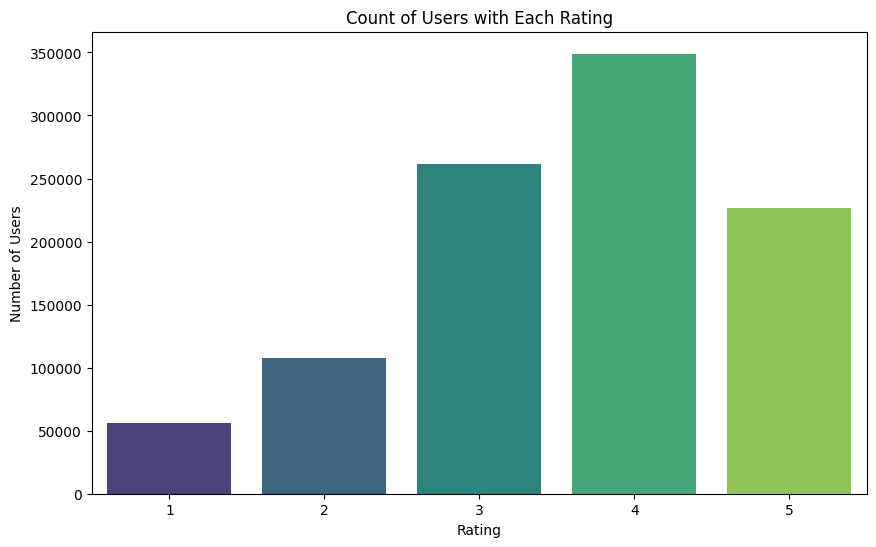

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=ratingdata, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Count of Users with Each Rating')
plt.show()

In [11]:
# Mapping of occupation codes to occupation names
occupation_mapping = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student", 5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }
userdata['Occupation_Name'] = userdata['Occupation'].map(occupation_mapping)

In [12]:
userdata.head()

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


Text(0.5, 1.0, 'Distribution of Users Across Occupations')

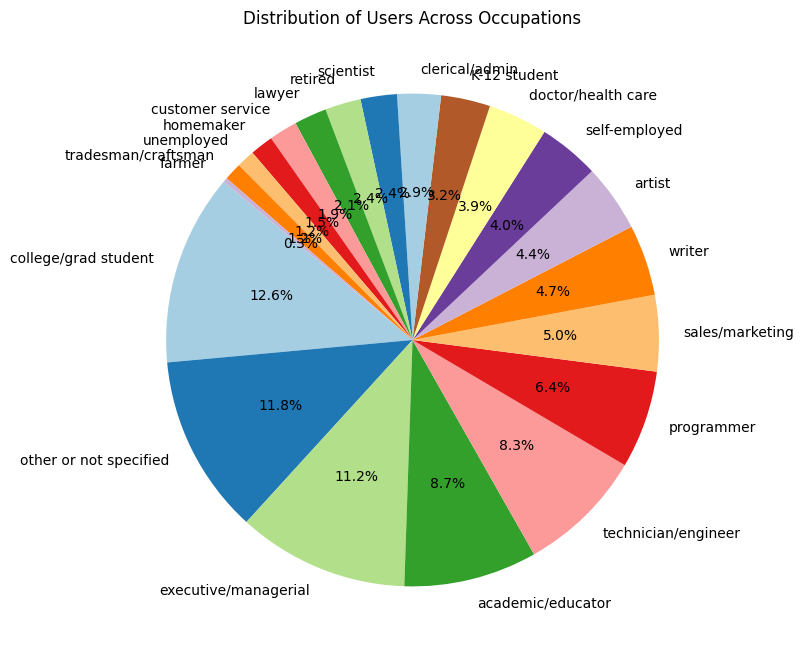

In [13]:
occupation_counts = userdata['Occupation_Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Users Across Occupations')

# Collaborative Filtering

In [14]:
merged_data = pd.merge(moviedata, ratingdata, left_on='ID', right_on='MovieID')

## Fully merged Matrix

In [15]:
ratings = merged_data.pivot_table(index='UserID', columns='Title', values='Rating')
ratings

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
myRatings = ratings.loc[300].dropna()
myRatings

Title
Adventures in Babysitting (1987)                4.0
Air Force One (1997)                            4.0
Airplane! (1980)                                4.0
Alien (1979)                                    5.0
Aliens (1986)                                   4.0
                                               ... 
Willy Wonka and the Chocolate Factory (1971)    5.0
Witness (1985)                                  4.0
Wizard of Oz, The (1939)                        3.0
Working Girl (1988)                             3.0
World Is Not Enough, The (1999)                 2.0
Name: 300, Length: 249, dtype: float64

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(ratings.fillna(0))

In [18]:
cosine_sim.shape

(6040, 6040)

## Compute Cosine Similarity Matrix for users who have watched a particular movie

In [19]:
# Function to compute similarity matrix considering only users who have watched movie 'k'
def compute_filtered_cosine_similarity(ratings_matrix, movie_k):
    # Filter ratings matrix to include only users who have watched movie 'k'
    users_with_movie_k = ratings_matrix[ratings_matrix[movie_k].notna()]

    # Compute cosine similarity matrix using filtered ratings
    filtered_cosine_sim = cosine_similarity(users_with_movie_k.fillna(0))

    return filtered_cosine_sim

# Example: Compute similarity matrix considering only users who have watched movie 'Toy Story (1995)'
movie_k = 'Toy Story (1995)'
filtered_cosine_sim = compute_filtered_cosine_similarity(ratings, movie_k)

print("Shape of filtered cosine similarity matrix:", filtered_cosine_sim.shape)

Shape of filtered cosine similarity matrix: (2077, 2077)


In [20]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your ratings matrix is named 'ratings' and cosine similarity matrix is named 'cosine_sim'
# Also assuming the new user's ratings are provided as a dictionary where keys are movie names and values are ratings

def recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings, n=5):
    # Add the new user's ratings to the ratings matrix
    new_user_row = pd.Series(new_user_ratings, name='NewUser')
    ratings = ratings.append(new_user_row)

    # Compute cosine similarity between the new user and existing users
    new_user_sim = cosine_similarity(ratings.fillna(0))

    # Get the similarity values between the new user and existing users
    new_user_sim_values = new_user_sim[-1]  # Assuming the new user is the last row

    # Sort users by similarity values in descending order (excluding the new user)
    sorted_similar_users = sorted(list(enumerate(new_user_sim_values[:-1])), key=lambda x: x[1], reverse=True)

    # Initialize a dictionary to store aggregated ratings from similar users
    aggregated_ratings = {}

    # Aggregate ratings from similar users
    for user_id, sim_value in sorted_similar_users:
        similar_user_ratings = ratings.iloc[user_id]
        for movie, rating in similar_user_ratings.items():
            if pd.notna(rating) and movie not in new_user_ratings:
                if movie not in aggregated_ratings:
                    aggregated_ratings[movie] = []
                aggregated_ratings[movie].append(rating * sim_value)

    # Calculate the average rating for each movie
    avg_ratings = {movie: sum(ratings) / len(ratings) for movie, ratings in aggregated_ratings.items()}

    # Sort movies by average rating in descending order
    sorted_avg_ratings = sorted(avg_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the top N recommended movies
    top_n_recommendations = sorted_avg_ratings[:n]
    return top_n_recommendations

# Example: New user provides ratings for some movies
new_user_ratings = {'Toy Story (1995)': 5, 'Jurassic Park (1993)': 4, 'Forrest Gump (1994)': 3}

# Get recommendations for the new user
recommendations = recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings)
print("Top 5 recommended movies for the new user:")
for movie, rating in recommendations:
    print(movie, ":", rating)


<ipython-input-20-96684992d00b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append(new_user_row)


Top 5 recommended movies for the new user:
Alley Cats, The (1968) : 0.5212466913156832
Bittersweet Motel (2000) : 0.49896219309901635
Castaway Cowboy, The (1974) : 0.43919015546822104
Soft Toilet Seats (1999) : 0.41068925864504513
Schlafes Bruder (Brother of Sleep) (1995) : 0.37318224814267376


## Including Bias as well

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your ratings matrix is named 'ratings' and cosine similarity matrix is named 'cosine_sim'
# Also assuming the new user's ratings are provided as a dictionary where keys are movie names and values are ratings

def recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings, n=5):
    # Add the new user's ratings to the ratings matrix
    new_user_row = pd.Series(new_user_ratings, name='NewUser')
    ratings = ratings.append(new_user_row)

    # Compute cosine similarity between the new user and existing users
    new_user_sim = cosine_similarity(ratings.fillna(0))

    # Get the similarity values between the new user and existing users
    new_user_sim_values = new_user_sim[-1]  # Assuming the new user is the last row

    # Sort users by similarity values in descending order (excluding the new user)
    sorted_similar_users = sorted(list(enumerate(new_user_sim_values[:-1])), key=lambda x: x[1], reverse=True)

    # Initialize a dictionary to store aggregated ratings from similar users
    aggregated_ratings = {}

    # Aggregate ratings from similar users
    for user_id, sim_value in sorted_similar_users:
        similar_user_ratings = ratings.iloc[user_id]
        for movie, rating in similar_user_ratings.items():
            if pd.notna(rating) and movie not in new_user_ratings:
                if movie not in aggregated_ratings:
                    aggregated_ratings[movie] = []
                aggregated_ratings[movie].append(rating * sim_value)

    # Calculate the average rating for each movie
    avg_ratings = {movie: sum(ratings) / len(ratings) for movie, ratings in aggregated_ratings.items()}

    # Sort movies by average rating in descending order
    sorted_avg_ratings = sorted(avg_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the top N recommended movies
    top_n_recommendations = sorted_avg_ratings[:n]
    return top_n_recommendations

# Example: New user provides ratings for some movies
new_user_ratings = {'Toy Story (1995)': 5, 'Jurassic Park (1993)': 4, 'Forrest Gump (1994)': 3}

# Get recommendations for the new user
recommendations = recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings)
print("Top 5 recommended movies for the new user:")
for movie, rating in recommendations:
    print(movie, ":", rating)


<ipython-input-21-96684992d00b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append(new_user_row)


Top 5 recommended movies for the new user:
Alley Cats, The (1968) : 0.5212466913156832
Bittersweet Motel (2000) : 0.49896219309901635
Castaway Cowboy, The (1974) : 0.43919015546822104
Soft Toilet Seats (1999) : 0.41068925864504513
Schlafes Bruder (Brother of Sleep) (1995) : 0.37318224814267376


In [22]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import math

def recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings, n=10):
    # Add the new user's ratings to the ratings matrix
    new_user_row = pd.Series(new_user_ratings, name='NewUser')
    ratings = ratings.append(new_user_row)

    # Compute the average rating given by the new user
    new_user_bias = sum(new_user_ratings.values()) / len(new_user_ratings)

    # Compute cosine similarity between the new user and existing users
    new_user_sim = cosine_similarity(ratings.fillna(0))

    # Get the similarity values between the new user and existing users
    new_user_sim_values = new_user_sim[-1]  # Assuming the new user is the last row

    # Filter users with similarity less than 0.4
    filtered_similar_users = [(user_id, sim_value) for user_id, sim_value in enumerate(new_user_sim_values[:-1]) if sim_value >= 0.3]

    # Initialize a dictionary to store aggregated ratings from similar users
    aggregated_ratings = {}

    # Aggregate ratings from similar users
    for user_id, sim_value in tqdm(filtered_similar_users, desc="Aggregating ratings", total=len(filtered_similar_users)):
        similar_user_ratings = ratings.iloc[user_id]
        for movie, rating in similar_user_ratings.items():
            if pd.notna(rating) and movie not in new_user_ratings:
                if movie not in aggregated_ratings:
                    aggregated_ratings[movie] = []
                # Remove bias from the rating and add it to the aggregated ratings
                bias_corrected_rating = rating - ratings.mean(axis=1)[user_id]
                aggregated_ratings[movie].append(bias_corrected_rating * sim_value)

    # Calculate the average rating for each movie, divided by the sum of similarities
    avg_ratings = {}
    for movie, ratings in aggregated_ratings.items():
        average_rating = (sum(ratings) / sum(new_user_sim_values[:-1])) + new_user_bias
        # Round the rating to the nearest integer
        rounded_rating = math.ceil(average_rating) if average_rating - math.floor(average_rating) >= 0.5 else math.floor(average_rating)
        avg_ratings[movie] = rounded_rating

    # Sort movies by average rating in descending order
    sorted_avg_ratings = sorted(avg_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the top N recommended movies
    top_n_recommendations = sorted_avg_ratings[:n]
    return top_n_recommendations

# Example: New user provides ratings for some movies
new_user_ratings = {'Toy Story (1995)': 5, 'Jurassic Park (1993)': 4, 'Forrest Gump (1994)': 3}

# Get recommendations for the new user
recommendations = recommend_movies_to_new_user(ratings, cosine_sim, new_user_ratings)
print("Top 5 recommended movies for the new user:")
for movie, rating in recommendations:
    print(movie, ":", rating)


<ipython-input-22-e9836a1f789f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append(new_user_row)
Aggregating ratings: 100%|██████████| 7/7 [00:39<00:00,  5.63s/it]

Top 5 recommended movies for the new user:
Abyss, The (1989) : 4
Apollo 13 (1995) : 4
As Good As It Gets (1997) : 4
Babe (1995) : 4
Dazed and Confused (1993) : 4
Gladiator (2000) : 4
Green Mile, The (1999) : 4
Groundhog Day (1993) : 4
Matrix, The (1999) : 4
Mighty Ducks, The (1992) : 4


<ipython-input-23-820c8165a06c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nratings, palette="viridis")


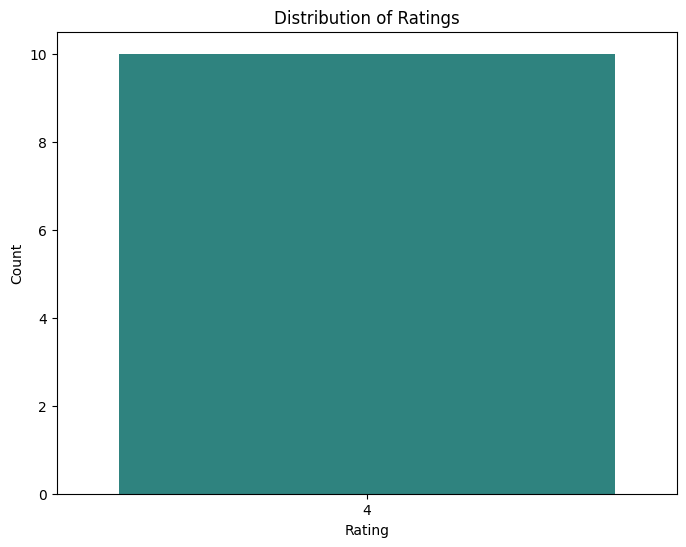

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

nratings = [rating for _, rating in recommendations]


plt.figure(figsize=(8, 6))
sns.countplot(x=nratings, palette="viridis")


plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


# Reduced SVD and KMeans - User And Genre Based

## Basics

In [24]:
from sklearn.decomposition import TruncatedSVD

In [26]:
# Fill missing values (NaNs) with 0 indicating no rating
ratings_filled = ratings.fillna(0)

# Create a TruncatedSVD object
svd = TruncatedSVD(n_components=50)

# Fit SVD to the filled ratings matrix
svd.fit(ratings_filled)

# Transform the filled ratings matrix to its reduced form
ratings_reduced = svd.transform(ratings_filled)


In [28]:
ratings_reduced.shape,ratings.shape

((6040, 50), (6040, 3706))

In [29]:
genre_matrix = moviedata['Genres'].str.get_dummies('|')

In [30]:
genre_matrix

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Main thing starts here

In [61]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [62]:
movie_data = pd.read_csv('movies.csv')

user_data = pd.read_csv('users.csv')

rating_data = pd.read_csv('ratings.csv')

In [63]:
# Create a genre matrix
genre_matrix = moviedata['Genres'].str.get_dummies('|')

# Append the genre matrix to the moviedata DataFrame
moviedata = pd.concat([moviedata, genre_matrix], axis=1)

# Display the updated moviedata DataFrame
moviedata

,ID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Merge movie and rating data
merged_data = pd.merge(ratingdata, moviedata, left_on='MovieID', right_on='ID')
merged_data

,UserID,MovieID,Rating,Timestamp,ID,Title,Genres,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,2198,Modulations (1998),Documentary,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,976029116,2703,Broken Vessels (1998),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,958153068,2845,White Boys (1999),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,957756608,3607,One Little Indian (1973),Comedy|Drama|Western,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
merged_data = pd.merge(userdata,merged_data, on='UserID')
merged_data

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name,MovieID,Rating,Timestamp,ID,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,48067,K-12 student,1193,5,978300760,1193,...,0,0,0,0,0,0,0,0,0,0
1,1,F,1,10,48067,K-12 student,661,3,978302109,661,...,0,0,0,1,0,0,0,0,0,0
2,1,F,1,10,48067,K-12 student,914,3,978301968,914,...,0,0,0,1,0,1,0,0,0,0
3,1,F,1,10,48067,K-12 student,3408,4,978300275,3408,...,0,0,0,0,0,0,0,0,0,0
4,1,F,1,10,48067,K-12 student,2355,5,978824291,2355,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,doctor/health care,1150,5,956715569,1150,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,M,25,6,11106,doctor/health care,2751,1,956716438,2751,...,0,0,0,0,0,0,0,0,0,0
1000206,6040,M,25,6,11106,doctor/health care,3289,5,956704305,3289,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,M,25,6,11106,doctor/health care,722,3,960971992,722,...,0,0,0,0,0,0,0,0,0,0


In [74]:
for i in merged_data.columns:
  print(i,end=" ")

UserID Gender Age Occupation Zip-code Occupation_Name MovieID Rating Timestamp ID Title Genres Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western 

In [80]:
# Select UserID, MovieID, and genre-related columns
user_genres_data = merged_data[['UserID', 'MovieID', 'Genres', 'Action', 'Adventure', 'Animation',
                                "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
                                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Drop duplicate columns
user_genres_data = user_genres_data.loc[:,~user_genres_data.columns.duplicated()]

# Display the resulting DataFrame
print(user_genres_data.columns)
user_genres_data


Index(['UserID', 'MovieID', 'Genres', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


,UserID,MovieID,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,Animation|Children's|Musical,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,914,Musical|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1150,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,2751,Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,6040,3289,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,722,Documentary,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
user_1_data = user_genres_data[user_genres_data['UserID'] == 1]
user_1_data

,UserID,MovieID,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,Animation|Children's|Musical,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,914,Musical|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1197,Action|Adventure|Comedy|Romance,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1,1287,Action|Adventure|Drama,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,2804,Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,594,Animation|Children's|Musical,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,919,Adventure|Children's|Drama|Musical,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Reduced SVD And Kmeans - User Movie Matrix

In [92]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [93]:
movie_data = pd.read_csv('movies.csv')
user_data = pd.read_csv('users.csv')
rating_data = pd.read_csv('ratings.csv')

In [94]:
# Merge rating data with movie data
merged_data = pd.merge(rating_data, movie_data, left_on='MovieID', right_on='ID')

# Merge with user data using UserID
merged_data = pd.merge(merged_data, user_data, on='UserID')

# Pivot table of user ratings with movie titles as columns
user_ratings = merged_data.pivot_table(index='UserID', columns='Title', values='Rating').fillna(0)

In [95]:
user_ratings

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Apply SVD to reduce dimensions of the user ratings matrix
svd = TruncatedSVD(n_components=400)  # Adjust the number of components as needed
user_ratings_reduced = svd.fit_transform(user_ratings)

In [97]:
user_ratings_reduced.shape,user_ratings.shape

((6040, 400), (6040, 3706))

In [100]:
user_ratings_reduced

array([[ 8.93189807,  1.10470052, -1.53566649, ...,  0.72611139,
        -0.09898793,  0.30696103],
       [17.58519211, -1.81116344, -0.21968167, ...,  2.85580139,
        -0.12629601, -0.51708536],
       [ 9.48532305, -2.24424453,  1.9221131 , ..., -0.28161821,
         0.49124464,  0.63820985],
       ...,
       [ 2.62938706,  1.21740589,  0.06828633, ...,  0.33756582,
         0.22038662, -0.75740519],
       [13.26748399, 12.59756172,  6.15796662, ...,  1.34136704,
        -0.51467937, -0.87578611],
       [35.8972105 , 27.39245758,  1.74937053, ...,  1.68563304,
         1.26579462,  0.84559061]])

In [98]:
# Apply KMeans clustering to cluster users based on reduced features
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(user_ratings_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
# Add the cluster labels to the original user data
user_data['Cluster'] = clusters

# Dummy new user ratings
new_user_ratings = {'Toy Story (1995)': 5, 'Jurassic Park (1993)': 4, 'Forrest Gump (1994)': 3}

# Convert new user ratings to a DataFrame
new_user_data = pd.DataFrame(new_user_ratings.values(), index=new_user_ratings.keys(), columns=['Rating']).T

# Ensure new user data has the same feature names as the original user-movie-rating matrix
missing_columns = set(user_movie_rating_matrix.columns) - set(new_user_data.columns)
for column in missing_columns:
    new_user_data[column] = 0

# Find the cluster of the new user
new_user_cluster = kmeans.predict(svd.transform(new_user_data))

NameError: name 'user_movie_rating_matrix' is not defined